<a href="https://colab.research.google.com/github/joydeep10/nlp_text_summarizer/blob/main/text_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def read_article(file_name):
  file = open(file_name,"r")
  filedata = file.readlines()
  article = filedata[0].split(". ")
  sentences = []

  for sentence in article:
    print(sentence)
    sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" ")) #replacing non-alphabetic characters and then splitting the sentence into a list of words.
  sentences.pop()

  return sentences
  #returns a list of sentences where each sentence is represented as a list of words.

In [ ]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2)) #list of unique words by combining the words from both sentences and converting it to a set.

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1

    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

In [ ]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


#The function returns the final similarity matrix, where each element represents the similarity score between the corresponding pair of sentences.

   | S1  S2  S3  S4
---------------------
S1 |  1  s12 s13 s14
S2 | s21  1  s23 s24
S3 | s31 s32  1  s34
S4 | s41 s42 s43  1
above is the example of how pairwise similarity looks like




In [ ]:
import matplotlib.pyplot as plt


def generate_summary(file_name, top_n=5):
  nltk.download("stopwords")
  stop_words = stopwords.words('english')
  summarize_text = []

  sentences = read_article(file_name)

  sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

  #then rank the sentences in the similarity matrix
  sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
  scores = nx.pagerank(sentence_similarity_graph)

  #Visualize the Graph
  plt.figure(figsize=(10, 8))
  nx.draw(sentence_similarity_graph, with_labels=True, font_weight='bold')
  plt.title('Similarity Graph')
  plt.show()

    #Sort the rank and pick top sentences
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
  #print("Indexes of top ranked_sentence order are ", ranked_sentence)

  for i in range (top_n):
    summarize_text.append(" ".join(ranked_sentence[i][1]))

  print("Summarize Text: \n", ". ".join(summarize_text))

In [ ]:
generate_summary("/content/drive/MyDrive/NLP/text_summarizer/The_minds_eye.txt",2)

Toward the end of his life, maybe suspecting or sensing that it was coming to a close, Dr
Oliver Sacks tended to focus his efforts on sweeping intellectual projects like On the Move (a memoir), The River of Consciousness (a hybrid intellectual history), and Hallucinations (a book-length meditation on, what else, hallucinations)
But in 2010, he gave us one more classic in the style that first made him famous, a form he revolutionized and brought into the contemporary literary canon: the medical case study as essay
In The Mind’s Eye, Sacks focuses on vision, expanding the notion to embrace not only how we see the world, but also how we map that world onto our brains when our eyes are closed and we’re communing with the deeper recesses of consciousness
Relaying histories of patients and public figures, as well as his own history of ocular cancer (the condition that would eventually spread and contribute to his death), Sacks uses vision as a lens through which to see all of what makes us h

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In an attempt to build an AI-ready workforce, Microsoft announced Intelligent Cloud Hub which has been launched to empower the next generation of students with AI-ready skills
Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services
As part of the program, the Redmond giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses
The company will provide AI development tools and Azure AI services such as Microsoft Cognitive Services, Bot Services and Azure Machine Learning.According to Manish Prakash, Country General Manager-PS, Health and Education, Microsoft India, said, "With AI being the defining technology of our time, it is transforming lives and industry and 

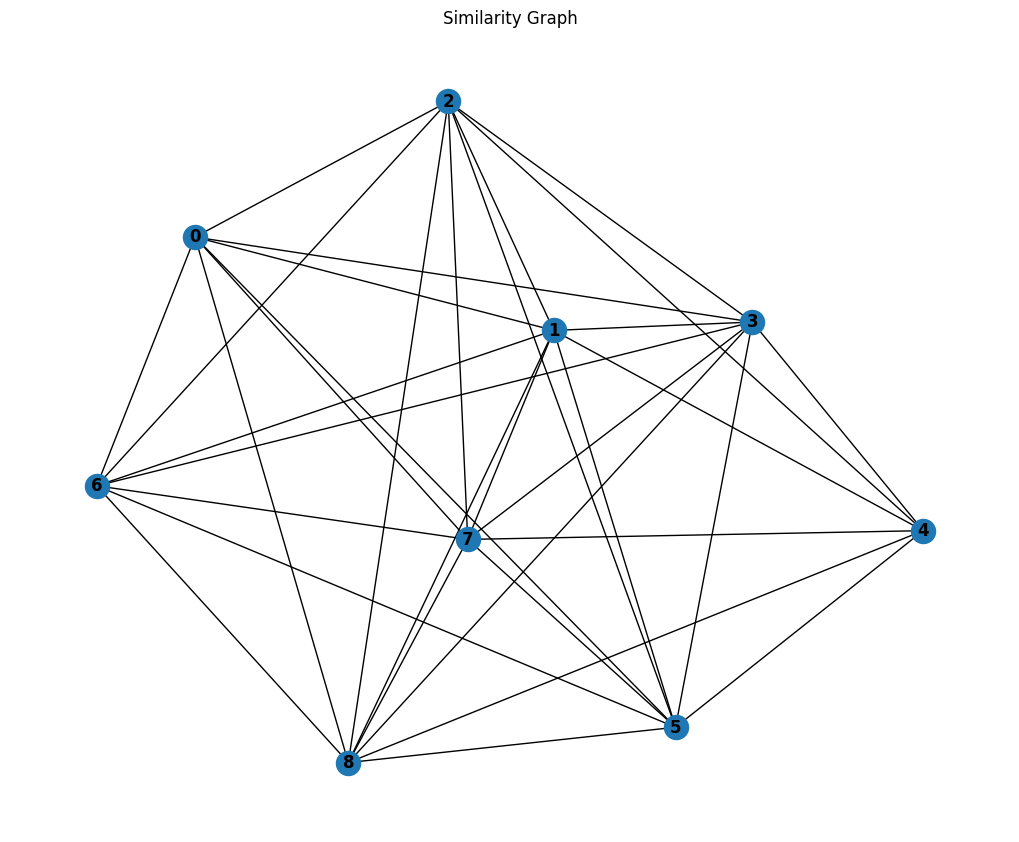

Summarize Text: 
 Envisioned as a three-year collaborative program, Intelligent Cloud Hub will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. The company will provide AI development tools and Azure AI services such as Microsoft Cognitive Services, Bot Services and Azure Machine Learning.According to Manish Prakash, Country General Manager-PS, Health and Education, Microsoft India, said, "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset


In [ ]:
generate_summary("/content/drive/MyDrive/NLP/text_summarizer/msft.txt",2)